In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Making the Dataset

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2,n_redundant=0, n_clusters_per_class=1, weights=[0.99],n_classes=2, random_state=42)
## weights = [0.99] means that class 0 will be having 9900 datapoints. 

In [3]:
X

array([[ 0.20476032, -0.35766544],
       [-1.38119698,  1.39004105],
       [ 0.55620276, -0.69167191],
       ...,
       [-0.38308762,  0.10109103],
       [-0.99091527,  0.76611131],
       [ 0.21029584, -0.09065576]], shape=(10000, 2))

In [4]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(10000,))

In [5]:
from collections import Counter
Counter(y)

Counter({np.int64(0): 9859, np.int64(1): 141})

<Axes: xlabel='0', ylabel='1'>

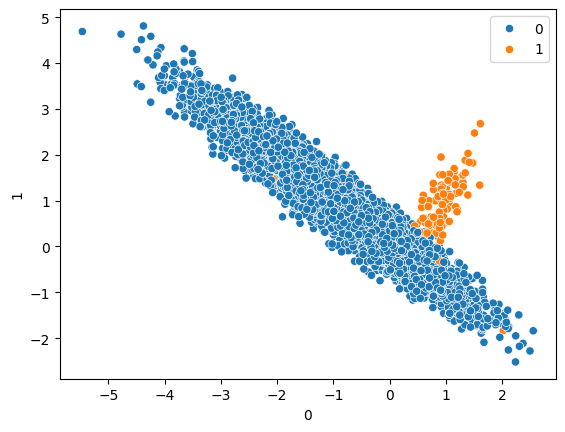

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

This is an imbalanced Dataset

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Training with Hyperparameter Tuning of class_weight

In [9]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [10]:
class_weights = [{0 : i, 1 : j} for i in [1, 10, 50, 100] for j in [1, 10, 50, 100]]
class_weights

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [11]:
params = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['newton-cg', 'lbfgs', 'linlinear', 'sag', 'saga'],
    'class_weight' : class_weights
}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold()

grid = GridSearchCV(
    estimator = logistic, 
    param_grid= params,
    scoring='accuracy',
    cv=stratified_cv
)

In [13]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [14]:
grid.best_params_

{'C': 1.0,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [15]:
y_pred = grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

## Evaluation Metrices

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :\n', accuracy)
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix :\n', cm)
cr = classification_report(y_test, y_pred)
print('\nClassification Report :\n', cr)

Accuracy :
 0.994

Confusion Matrix :
 [[2456    1]
 [  14   29]]

Classification Report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2457
           1       0.97      0.67      0.79        43

    accuracy                           0.99      2500
   macro avg       0.98      0.84      0.90      2500
weighted avg       0.99      0.99      0.99      2500



If we consider class 1 as positive then from the Confusion Matrix we can figure it out that FN = 14 and FP = 1. Thus Precision is much higher and recall is much lower